# WorldWideProducts - Project 5 - Data Science

### Project Description
#### The project is to evaluate the trend of a demand of the product and forecast its demand trend 
#### for the next 1 year.

### Dataset source
#### https://www.kaggle.com/felixzhao/productdemandforecasting

#### import required libraries

In [1]:
from pandas import DataFrame, read_csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Load required product data

In [2]:
productData=matchesRaw = pd.read_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/World Wide Products - Project 5/data/processed/Historical Product Demand.csv')

In [3]:
productData.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


### Data - Data processing Feature Engineering

#### 1. Bucket days to months and separate out years.
#### 2. Drop Date column
#### 3. One hot encoding for product_code,Product_Category,Warehouse to uniquely identify by integers.
#### 4. OrderDemand seems to be a string and has negative values mentioned by value in (), 
####    converting all the values to integers and stringreplace to replace() with a '-'
#### 5. Finally dropping unnecessary columns.

In [4]:
productData['dateformat'] = pd.to_datetime(productData['Date'])

In [5]:
productData['year'], productData['month'] = productData['dateformat'].dt.year, productData['dateformat'].dt.month

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
productData['ProdID']=encoder.fit_transform(productData['Product_Code'].astype('str'))
productData['CategoryID']=encoder.fit_transform(productData['Product_Category'].astype('str'))
productData['WarehouseID']=encoder.fit_transform(productData['Warehouse'].astype('str'))

In [7]:
processedProductData=productData.drop(['Date','Product_Category','Product_Code','Warehouse'],axis=1)

In [8]:
processedProductData['Order_Demand'] = processedProductData['Order_Demand'].str.strip()
processedProductData['Order_Demand']= processedProductData['Order_Demand'].str.replace("(","-")
processedProductData['Order_Demand']= processedProductData['Order_Demand'].str.replace(")","")
processedProductData['Order_Demand'] = processedProductData['Order_Demand'].astype(int)

In [9]:
processedProductData.head(5)

,Order_Demand,dateformat,year,month,ProdID,CategoryID,WarehouseID
0,100,2012-07-27,2012.0,7.0,982,27,2
1,500,2012-01-19,2012.0,1.0,968,27,2
2,500,2012-02-03,2012.0,2.0,968,27,2
3,500,2012-02-09,2012.0,2.0,968,27,2
4,500,2012-03-02,2012.0,3.0,968,27,2


### Data-Exploration 

#### Trying to identify the Product with Highest demand and perform forecast on that product.
#### 1.GroupBy ProductId and Perform sum operation on Order_Demand, followed by a sort_values

In [10]:
GroupedByOrderDemand=processedProductData.groupby(['ProdID'])['Order_Demand'].sum().reset_index()

In [11]:
TOP5ProductsInDemand = GroupedByOrderDemand.sort_values('Order_Demand', ascending=False).head(5)
TOP5ProductsInDemand

,ProdID,Order_Demand
1348,1348,470710000
1237,1237,288927000
82,82,210427000
1330,1330,169777000
1284,1284,121992000


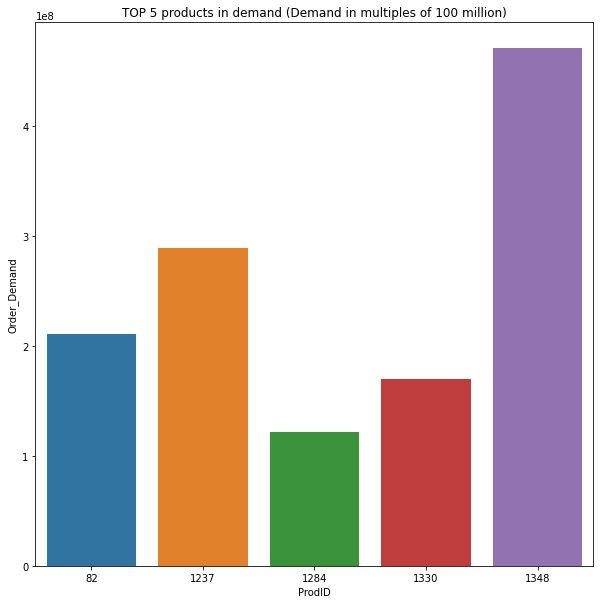

In [12]:
plt.figure(figsize=(10,10))
import seaborn as sns
ax = sns.barplot(x='ProdID',y='Order_Demand',data=TOP5ProductsInDemand)
ax.set(xlabel='ProdID', ylabel='Order_Demand')
plt.title("TOP 5 products in demand (Demand in multiples of 100 million)")
plt.show()

#### Identified the top on demand product.. exploring other details for the top on demand  product...-1348

In [13]:
ExploringDataForHighestDemandProduct = processedProductData.loc[(processedProductData['ProdID']==1348)]
ExploringDataForHighestDemandProduct

,Order_Demand,dateformat,year,month,ProdID,CategoryID,WarehouseID
276,80000,2012-04-18,2012.0,4.0,1348,18,2
282,70000,2012-05-21,2012.0,5.0,1348,18,2
289,80000,2012-06-26,2012.0,6.0,1348,18,2
292,100000,2012-07-17,2012.0,7.0,1348,18,2
296,100000,2012-08-24,2012.0,8.0,1348,18,2
...,...,...,...,...,...,...,...
1046514,20000,2016-10-03,2016.0,10.0,1348,18,2
1046515,10000,2016-09-16,2016.0,9.0,1348,18,2
1046516,30000,2016-11-01,2016.0,11.0,1348,18,2
1046517,20000,2016-12-01,2016.0,12.0,1348,18,2


#### Analysis of Trend of the demand by Year

In [14]:
TOPProdDemandByYear=ExploringDataForHighestDemandProduct.groupby(['year'])['Order_Demand'].sum().reset_index()

In [15]:
TOPProdDemandByYear

,year,Order_Demand
0,2012.0,93565000
1,2013.0,102554000
2,2014.0,95109000
3,2015.0,93060000
4,2016.0,86322000
5,2017.0,100000


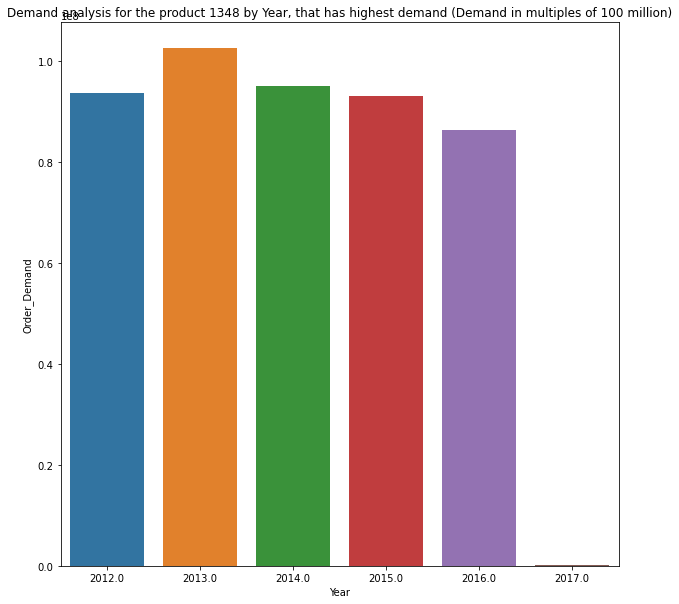

In [16]:
plt.figure(figsize=(10,10))
import seaborn as sns
ax = sns.barplot(x='year',y='Order_Demand',data=TOPProdDemandByYear)
ax.set(xlabel='Year', ylabel='Order_Demand')
plt.title("Demand analysis for the product 1348 by Year, that has highest demand (Demand in multiples of 100 million)")
plt.show()

#### Analysis of Trend of the demand by Month

In [17]:
TOPProdDemandByMonth=ExploringDataForHighestDemandProduct.groupby(['month'])['Order_Demand'].sum().reset_index()
TOPProdDemandByMonth

,month,Order_Demand
0,1.0,43713000
1,2.0,36539000
2,3.0,39928000
3,4.0,39860000
4,5.0,39564000
5,6.0,38268000
6,7.0,39409000
7,8.0,34565000
8,9.0,38062000
9,10.0,42534000


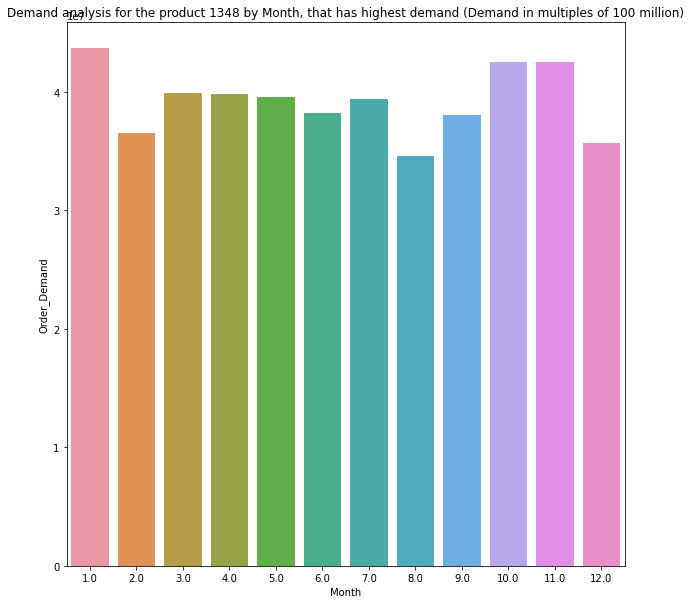

In [18]:
plt.figure(figsize=(10,10))
import seaborn as sns
ax = sns.barplot(x='month',y='Order_Demand',data=TOPProdDemandByMonth)
ax.set(xlabel='Month', ylabel='Order_Demand')
plt.title("Demand analysis for the product 1348 by Month, that has highest demand (Demand in multiples of 100 million)")
plt.show()

#### Diving into forecasting analysis for the identified product that has the highest demand - ID-1348

### More Data processing...
#### 1. Removing other unnecessary columns 
#### 2. FBprophet needs Columns to be ds and y, so renaming them.

In [19]:
FutureDemandAnalysisForHighestDemandProduct=ExploringDataForHighestDemandProduct.drop(['year','month','ProdID','WarehouseID','CategoryID'],axis=1)

### FB Prophet forecasting analysis

In [20]:
from fbprophet import Prophet
obj = Prophet(daily_seasonality=True)
FutureDemandAnalysisForHighestDemandProduct=FutureDemandAnalysisForHighestDemandProduct.reset_index()
FutureDemandAnalysisForHighestDemandProduct = FutureDemandAnalysisForHighestDemandProduct.rename(columns = {'dateformat': 'ds', 'Order_Demand': 'y' })
obj.fit(FutureDemandAnalysisForHighestDemandProduct)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Next 1 year(365 days) forecast

In [21]:
future = obj.make_future_dataframe(periods=365)

In [22]:
import datetime
forecast = obj.predict(future)

### Filtering the forecast for next 1 year after 2017 and Plot all related components.

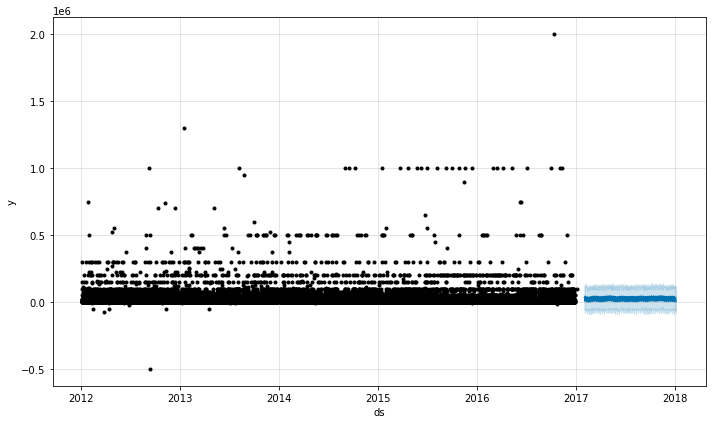

In [23]:
mask = (forecast['ds'] > '02-01-2017')
forecast=forecast.loc[mask]
figure1 = obj.plot(forecast)

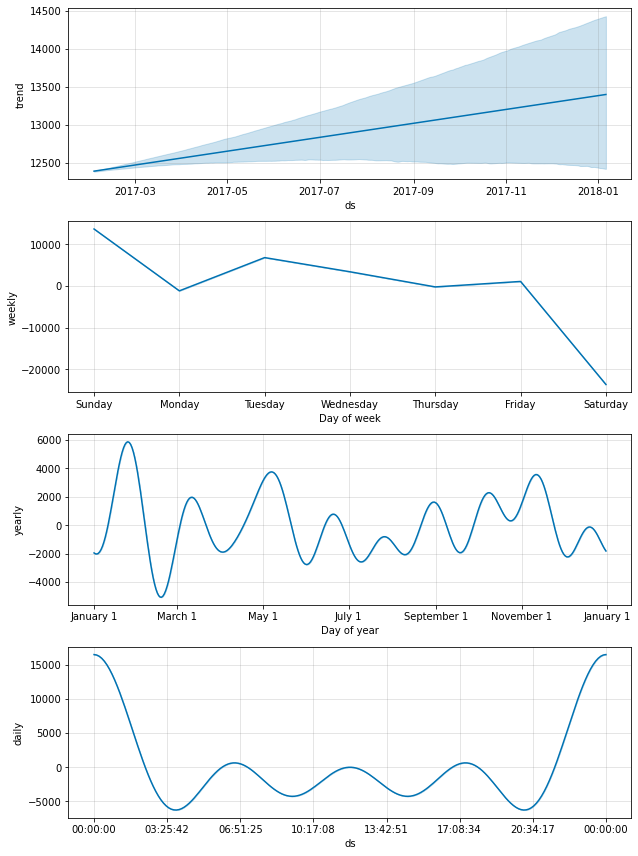

In [24]:
figure2 = obj.plot_components(forecast)

### Observations on Visualizations and Reports

#### 1. We can see from the forecast that there are high chances for Product 1358, to remain the product with highest demand for next one year too.

#### 2. Based on the demand graph consistently has risen from 2017 to 2018 with some possibility in the deviations, 
#### that can go far better than what its previous demand is, on the best case.
#### On the worst case, it shows a deviation that can fall just below the demand of what it is before.

#### 3. The weekly forecast suggests that Sunday would be the prime day for the product, and Saturday being sloppy on the demand perspective.

#### 4. The yearly forecast suggests that January end to February mid is the prime period for the product's business, 
#### and that February end can see a dip in the same.